![](img/base-topo.png)

# Kaggle Competition | Titanic - Predição de Sobreviventes

O dia é 15 de Abril de 1912, o **RMS Titanic** denominado 'inafundável' desapareceu em meio das águas do Atlântico Norte após se chocar com uma geleira. Por infelizmente não haver botes salva-vidas suficientes para todos que estavam abordo, dos 2224 passageiros e tripulantes, 1502 perderam sua vida.  

Por mais que houvesse algo que denominasse 'sorte' para definir a probabilidade de sobrevivência, alguns grupos eram mais propensos a sobreviver do que outros.  

A partir dessa análise e aplicação de Machine Learning, iremos realizar uma predição de quais pessoas possuem mais probabilidade de viver levando em consideração os dados dos passageiros. 

## Índice do Projeto

**1** - Obtenção dos dados  
**2** - Análise inicial dos dados  
&nbsp;&nbsp;&nbsp;&nbsp; **2.1** - Quantidade de entradas e variáveis  
&nbsp;&nbsp;&nbsp;&nbsp; **2.2** - Tipos de variáveis   
&nbsp;&nbsp;&nbsp;&nbsp; **2.2** - Visualizando a existência de valores nulos   
&nbsp;&nbsp;&nbsp;&nbsp; **2.3** - Visualizando a existência de outliers  
&nbsp;&nbsp;&nbsp;&nbsp; **2.4** - Distribuição dos dados  
&nbsp;&nbsp;&nbsp;&nbsp; **2.5** - Grupos com mais chances de sobreviver  
**3** - Pré-processamento dos dados  
&nbsp;&nbsp;&nbsp;&nbsp; **3.1** - Tratamento valores faltantes  
&nbsp;&nbsp;&nbsp;&nbsp; **3.2** - Deletando colunas que não serão utilizadas  
&nbsp;&nbsp;&nbsp;&nbsp; **3.3** - Tratamento variáveis categóricas  
&nbsp;&nbsp;&nbsp;&nbsp; **3.3** - Tratamento variáveis numéricas  
**4** - Aplicando modelo de aprendizagem de máquina  
**5** - Criando o arquivo para a submissão da competição


<h2 id="#obtencao-dos-dados">Obtenção dos Dados</h2>

Os dados utilizados nesse projeto foram dispolibilizados pelo [Kaggle](https://www.kaggle.com/) na competição [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/overview).

In [1]:
# importando as bibliotecas necessarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# configuracoes
sns.set_style("darkgrid")

# importando os dados para um dataframe

df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

Para validar que a importação foi feita corretamente, iremos visualizar as primeiras e últimas entradas para certificar-se que está tudo ok.

In [2]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


<h2 id="analise-inicial">Analise inicial dos dados</h2>

Nesta fase iremos conhecer o dataset que iremos trabalhar, onde analisaremos:  

- *Quantidade de entradas e variáveis*  
- *Quais os tipos das variáveis*
- *Validação de existência de valores nulos*  
- *Validação de existência de outliers*

<h3 id="qtd-ent-var"> Quantidade de entradas e variáveis </h3>

In [6]:
print(f"O dataset de treino possui {df_train.shape[0]} entradas e {df_train.shape[1]} variáveis.")
print(f"O dataset de teste possui {df_test.shape[0]} entradas e {df_test.shape[1]} variáveis.")

O dataset de treino possui 891 entradas e 12 variáveis.
O dataset de teste possui 418 entradas e 11 variáveis.


<h3 id="tipos-de-variaveis"> Tipos de variáveis </h3>

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### Descrição das variáveis:

- **PassengerId**: número de identificação dos passageiros  
- **Survived**: valor binário que identifica se o passageiro sobreviveu (1) ou não (0).  
- **Pclass**: valores que categorizam a classe econômica dos passageiros, onde:  
&nbsp;&nbsp;&nbsp;&nbsp; **1st** : classe alta  
&nbsp;&nbsp;&nbsp;&nbsp; **2st** : classe média  
&nbsp;&nbsp;&nbsp;&nbsp; **3st** : classe baixa    
- **Name**: nome do passageiro  
- **Sex**: sexo do passageiro definido como *male* ou *female*  
- **Age**: idade do passageiro  
- **SibSp**: quantidade de irmãos ou conjugê presentes no navio 
- **Parch**: quantidade de parentes (pais, filhos) presentes no navio  
- **Ticket**: número do ticket  
- **Fare**: tarifa do passageiro  
- **Cabin**: número da cabine do passageiro  
- **Embarked**: porto que o passageiro embarcou, onde:  
&nbsp;&nbsp;&nbsp;&nbsp; **C** : Cherbourg  
&nbsp;&nbsp;&nbsp;&nbsp; **Q** : Queenstown  
&nbsp;&nbsp;&nbsp;&nbsp; **S** : Southampton  

As informações passadas pelo método `df.info()` também nos mostra a presença de valores nulos no nosso dataframe, iremos verifica-los agora. 

<h3 id="vis-valores-nulos"> Visualizando a existência de valores nulos </h3>
Após identificarmos que as variáveis `Age` e `Cabin` possuem valores nulos a partir do método *info*, iremos mensurar a porcentagem desses valores referente a quantidade de entradas do nosso dataset:

In [9]:
df_train.isnull().sum() / df_train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [10]:
df_test.isnull().sum() / df_train.shape[0]

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.096521
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.001122
Cabin          0.367003
Embarked       0.000000
dtype: float64

Após calcularmos as porcentagens, podemos concluir que:  

No dataset de treino, a variável `Age` possui cerca de 19% dos seus valores nulos, a variável `Cabin` possui 77% e a `Embarked` possui um pouco mais que 0,22% dos valores nulos.  

No dataset de teste, a variável `Age` possui cerca de 9% dos seus valores nulos, a variável `Fare` possui 0,11% e a `Cabin` possui 36% dos valores nulos.  

<h3 id="vis-outliers"> Validação de existência de outliers </h3>
Visualmente ao consultar a descrição do nosso dataset, conseguimos perceber que os valores estão próximos da realidade então não possuira outliers.

In [11]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<h3 id="dist-dados"> Distribuição dos dados </h3>

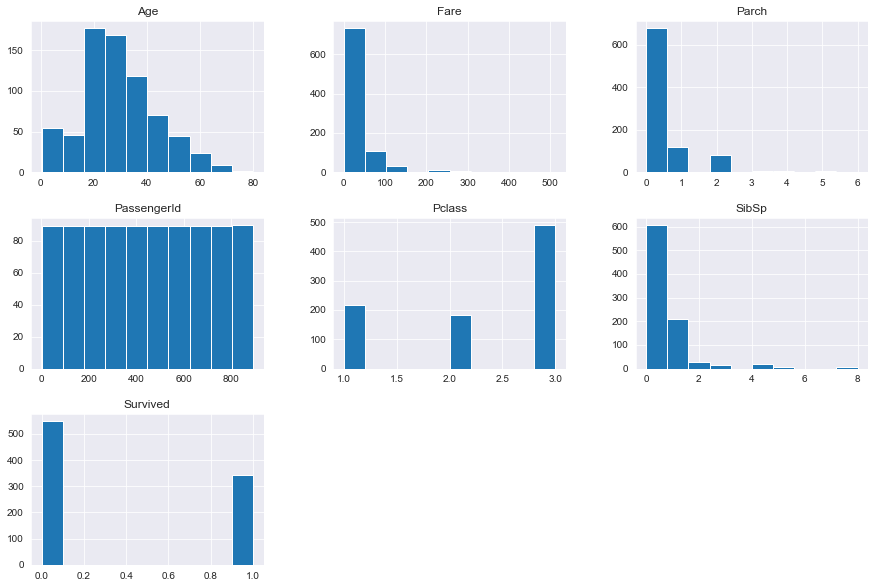

In [13]:
# histograma das variáveis numéricas
df_train.hist(figsize=(15,10));

A partir da visualização das variáveis numéricas, podemos ver que:  

- A idade da maioria dos passageiros está por volta de *20* a *30* anos.  
- A maioria dos passageiros são da classe 3 (classe baixa).  

<h3 id="grupo-sobreviventes"> Grupos com mais probabilidades de sobreviver </h3>

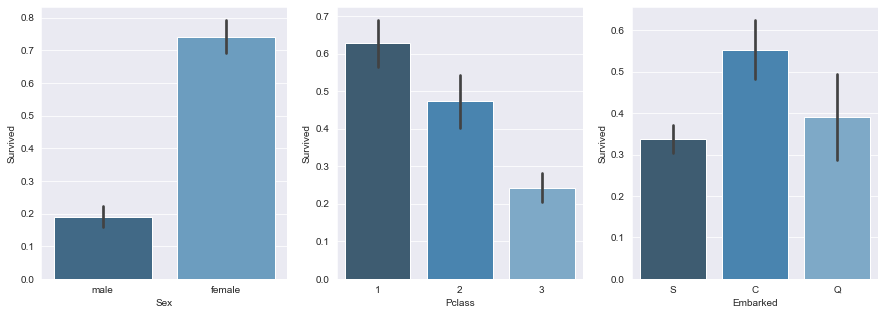

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))

sns.barplot(x='Sex', y='Survived', data=df_train, ax=ax1, palette="Blues_d")
sns.barplot(x='Pclass', y='Survived', data=df_train, ax=ax2, palette="Blues_d")
sns.barplot(x='Embarked', y='Survived', data=df_train, ax=ax3, palette="Blues_d");

Ao analisar a relação da variável `Survived` com as variáveis `Sex`, `PClass` e `Embarked`, podemos visualizar que:  

- As mulheres possuem mais chances de sobreviver  
- Os passageiros da classe 1st possuem mais chances de sobreviver  
- Os passageiros que embarcaram em Cherbourg possuem mais chances de sobreviver  

<h2 id="preprocessamento"> Pré-processamento dos dados </h2>

Nesta etapa, iremos tratar os dados faltantes nos nossos datasets. Para facilitar um pouco daqui pra frente, iremos juntar os dois dataframes para facilitar o tratamentos dos dados. Em uma consulta a um post do [Sigmoidal](https://sigmoidal.ai/data-science-titanic-python-2/), onde tratam esse mesmo dataset, achei interessante a forma com que ele trata o merge então resolvi aplicar ao projeto também.

In [15]:
# salvando os ids para utiliza-los na separação posteriormente
train_ids = df_train.shape[0]
test_ids = df_test.shape[0]

In [16]:
# salvando os ids dos passageiros do dataframe de teste
passengerId = df_test['PassengerId']

In [17]:
# extrair a coluna survived e excluir ela do dataframe de treino
y = df_train['Survived'].copy()
df_train.drop(['Survived'], axis=1, inplace=True)

In [18]:
# concatenar teste e treino em um dataframe único
df_merged = pd.concat(objs=[df_train, df_test], axis=0).reset_index(drop=True)

In [19]:
print(f'O dataframe com todos os dados possui {df_merged.shape[0]} entradas e {df_merged.shape[1]} variáveis.')

O dataframe com todos os dados possui 1309 entradas e 11 variáveis.


In [20]:
df_merged.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h3 id="trat-valores-nulos"> Tratamento valores faltantes </h3>
Como vimos anteriormente, nosso dataset possui valores faltantes. Nesta etapa, ocorrerá o processamento para que os dados das outras colunas não sejam perdidos nas nossas predições.

In [21]:
df_merged.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [22]:
# preenchendo valores faltantes da 'Age' com a mediana
df_merged['Age'] = df_merged['Age'].fillna(value=df_merged['Age'].median())

# preenchendo o valor faltante da 'Fare' com a mediana
df_merged['Fare'] = df_merged['Age'].fillna(value=df_merged['Fare'].median())

# preenchendo os valores faltantes da 'Embarked' com o valor mais frequente
df_merged['Embarked'] = df_merged['Embarked'].fillna(value=df_merged['Embarked'].value_counts().index[0])

In [23]:
df_merged.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

<h3 id="drop-colunas"> Retirando colunas que não serão utilizadas </h3>
Como a coluna `Cabin` não será utilizada em nossas análises, não realizamos o tratamento dos dados faltantes pois vamos deleta-la do nosso dataframe.

In [24]:
df_merged = df_merged.drop(['Name', 'Cabin', 'Ticket'], axis=1)

In [25]:
df_merged.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,22.0,S
1,2,1,female,38.0,1,0,38.0,C
2,3,3,female,26.0,0,0,26.0,S
3,4,1,female,35.0,1,0,35.0,S
4,5,3,male,35.0,0,0,35.0,S


<h3 id="trat-var-cat"> Tratando variáveis categóricas </h3>
As variáveis categóricas que ainda estão no modelo de String são a `Sex` e `Embarked`. Iremos realizar um tratamento para transforma-las em valores binários.

In [26]:
# tratamento variavel Sex
df_merged['Sex'] = df_merged['Sex'].map({'male': 0, 'female': 1})

In [27]:
# tratamento variavel Embarked
df_merged = pd.get_dummies(df_merged, prefix=['Embarked'], columns=['Embarked'])

In [28]:
df_merged.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,3,0,22.0,1,0,22.0,0,0,1
1,2,1,1,38.0,1,0,38.0,1,0,0
2,3,3,1,26.0,0,0,26.0,0,0,1
3,4,1,1,35.0,1,0,35.0,0,0,1
4,5,3,0,35.0,0,0,35.0,0,0,1


<h3 id="trat-var-num"> Tratando as variáveis numéricas </h3>

In [29]:
num_variables = df_merged[['Age', 'Fare']]
scaler = StandardScaler().fit(num_variables.values)
num_variables = scaler.transform(num_variables.values)

df_merged[['Age', 'Fare']] = num_variables

In [30]:
df_merged.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,3,0,-0.581628,1,0,-0.581628,0,0,1
1,2,1,1,0.658652,1,0,0.658652,1,0,0
2,3,3,1,-0.271558,0,0,-0.271558,0,0,1
3,4,1,1,0.426099,1,0,0.426099,0,0,1
4,5,3,0,0.426099,0,0,0.426099,0,0,1


### Retornando aos dfs de treino e teste

In [31]:
df_train = df_merged.iloc[:train_ids]
df_test = df_merged.iloc[train_ids:]

<h2 id="aplicando-ml"> Aplicando modelo de aprendizado de máquina </h2>
Nesta etapa, iremos aplicar modelos de classificação para realizar a predição de quem sobreviveu ou não.

In [32]:
# importando os modelos 


# Definindo os hyperparametros
model_lr = LogisticRegression(solver='liblinear')
model_lr.fit(df_train, y)

y_pred = model_lr.predict(df_test)

In [33]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

<h2 id="criar-submissao"> Criando o arquivo para submissão da competição </h2>

In [34]:
pred_value = pd.Series(y_pred)

In [35]:
df_result = pd.concat([passengerId, pred_value], axis=1)

In [36]:
df_result.rename(columns={0 : 'Survived'}, inplace=True)

In [37]:
df_result.to_csv('submission.csv', index=False)

*UPDATE*: após enviar os valores de predição para a competição, o score de acurácia foi de 76% logo para a primeira entrada! :D